# MovieLens Project

#### Dataset Information:
 - Data.csv has information on ratings given by the users to a particular movie
 - item.csv has information related to the movies and their genre
 - user.csv has information of the users who have rated the movies

#### Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Reading datasets into dataframes:

In [2]:
moviesdata = pd.read_csv("item.csv")
userdata = pd.read_csv("user.csv")
ratingsdata = pd.read_csv("Data.csv")

#### Initial data analysis:

In [3]:
moviesdata.info()
moviesdata.describe()
moviesdata.shape
moviesdata.isnull().sum().sum()
userdata.info()
userdata.describe()
userdata.shape
userdata.isnull().sum().sum()
ratingsdata.info()
ratingsdata.describe()
ratingsdata.shape
ratingsdata.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

0

#### Observations:
 - All three datasets have zero missing values
 - There 1681 movies, 943 users, and 100000 ratings in these datasets
 - The mean rating for the movies is 3.53/5.00

#### Finding number of movies in each genre:

In [4]:
MoviesPerGenre = pd.DataFrame(moviesdata,columns=['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
Sum_MoviesPerGenre = MoviesPerGenre.sum(axis=0)
print(Sum_MoviesPerGenre)

unknown        1
Action       251
Adventure    135
Animation     42
Childrens    122
Comedy       505
Crime        109
Fantasy       22
Film-Noir     24
Horror        92
Musical       56
Mystery       61
Romance      247
Sci-Fi       101
Thriller     251
War           71
Western       27
dtype: int64


#### Insights:
The most common genre is comedy and there is only one movie that has a unknown genre.

#### Dropping the movie with unknown genre:

In [5]:
UnknownGenre = moviesdata[moviesdata['unknown'] == 1].index
moviesdata.drop(UnknownGenre)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Finding the movies with more than one genre:

In [6]:
moviesdata["Number of Genres"] = moviesdata.iloc[:, 4:20].sum(axis=1)
MultipleGenre = moviesdata.loc[moviesdata['Number of Genres'] >= 2]
MultipleGenre[['movie title', 'Number of Genres']]
total_count = len(MultipleGenre.index)
print('Total number of movies that have more than one genre:', total_count)

Total number of movies that have more than one genre: 811


#### Insights:
811 out of 1680 movies with a known genre have more than one genre.

#### Displaying univariate plots:

<AxesSubplot:xlabel='gender', ylabel='count'>

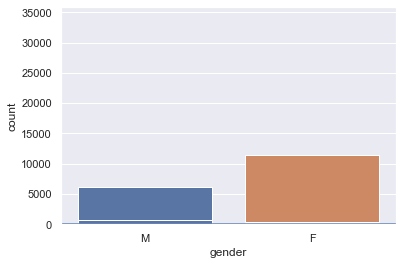

In [7]:
sns.distplot(userdata['age'])
sns.countplot(ratingsdata['rating'])
moviesdata['Release Year'] = moviesdata['release date'].str.split('-').str[2]
sns.countplot(moviesdata['Release Year'])
sns.countplot(userdata['occupation'])
sns.countplot(userdata['gender'])

#### Visualization of how popularity of genres has changed:

<AxesSubplot:ylabel='Release Year'>

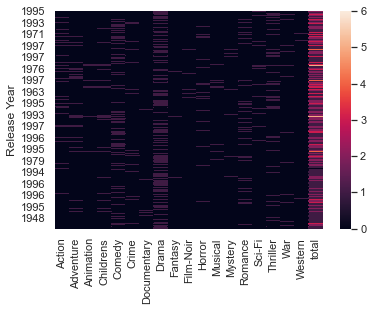

In [8]:
GenreByRelease1 = moviesdata
GenreByRelease2 = GenreByRelease1.drop(columns = ['movie id', 'movie title', 'release date', 'unknown', "Number of Genres"])
GenreByRelease2['total'] = GenreByRelease2.iloc[:, 1:19].sum(axis=1)
GenreByRelease = GenreByRelease2.set_index(['Release Year'])
(GenreByRelease.div(GenreByRelease['total'], axis= 0) * 100)
sns.heatmap(GenreByRelease)

#### Insights:
It looks like Drama has remained the most popular genre overall throughout the years. 

#### Finding the top 25 movies in average ratings for movies that have been rated more than 100 times:

In [9]:
ratingsdata.groupby('movie id')['rating'].count()
ratingsdata.groupby('movie id')['rating'].mean()
NumberRatings = ratingsdata
NumberRatings['Number of Ratings'] = ratingsdata.groupby('movie id')['rating'].count()
NumberRatings1 = NumberRatings.drop(columns = ['user id', 'timestamp', 'rating'])
NumberRatings1.set_index(['movie id'])
NumberRatings3 = NumberRatings1.drop_duplicates(subset=['movie id'])
NumberRatings2 = NumberRatings3.loc[NumberRatings3['Number of Ratings'] > 100]
NumberRatings2
HighestRated1 = ratingsdata.groupby(ratingsdata["movie id"], sort=False).mean().nlargest(25, 'rating')
HighestRated = HighestRated1.drop(columns = ['user id', 'timestamp'])
HighestRated

,rating,Number of Ratings
movie id,,
1189,5.000000,NaN
1500,5.000000,NaN
814,5.000000,NaN
1536,5.000000,NaN
1293,5.000000,NaN
1599,5.000000,NaN
1653,5.000000,NaN
1467,5.000000,NaN
1122,5.000000,NaN
